Comparisons of locomotion predictions of different mechanistic latent variable models.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

from disp import set_plot


STRAIN_KEY = '_'.join(['NM91', 'ZH23']).lower()
REG_KEY = 'ridge_alpha_10'

TARG_BHV = 'MTN'
TWDWS = [.03, 1, 60]
TARGS = [f'{TARG_BHV}_MN_{twdw}' for twdw in TWDWS]

PFX_BHV = f'data/simple/behav_xtd/behav_xtd'

MASKED = True

# Behavioral predictions from perturbed surrogate population recordings

In [5]:
KBHVS_FOLDERS_KEYS = [
    ('ma', 'neur_basic', 'Full MA pop.'),
    (None, None, None),
    (None, None, None),
    ('ma_med_r_fast_a', 'ma_pert', r'Med. $\tau_{int}$, fast $\tau_a$'),
    ('ma_med_r_med_a', 'ma_pert', r'Med. $\tau_{int}$, med $\tau_a$'),
    (None, None, None),
    ('ma_slow_r_fast_a', 'ma_pert', r'Slow $\tau_{int}$, fast $\tau_a$'),
    ('ma_slow_r_med_a', 'ma_pert', r'Slow $\tau_{int}$, med $\tau_a$'),
    (None, None, None),
    ('ma_medslow_r_fastmed_a', 'ma_pert', r'MS $\tau_{int}$, FM $\tau_a$'),
]

rslts_1 = []
rslts_60 = []

r2s_1 = []
r2s_60 = []

for kbhv, folder, key in KBHVS_FOLDERS_KEYS:
    if folder is not None:
        if not MASKED:
            fit_data = np.load(f'data/simple/mlv/{folder}/baker_{kbhv}_nm91_zh23_mtn_ridge_alpha_10.npy', allow_pickle=True)[0]
        else:
            fit_data = np.load(f'data/simple/mlv/{folder}/baker_{kbhv}_nm91_zh23_mtn_ridge_alpha_10_masked.npy', allow_pickle=True)[0]

        nsplit = len(fit_data['r2_test']['MTN_MN_60'])

        r2_1 = fit_data['r2_test']['MTN_MN_1'].mean()
        err_1 = fit_data['r2_test']['MTN_MN_1'].std()/np.sqrt(nsplit)
        
        r2_60 = fit_data['r2_test']['MTN_MN_60'].mean()
        err_60 = fit_data['r2_test']['MTN_MN_60'].std()/np.sqrt(nsplit)
        
        r2s_1.append(fit_data['r2_test']['MTN_MN_1'])
        r2s_60.append(fit_data['r2_test']['MTN_MN_60'])
    else:
        r2_1 = np.nan
        err_1 = np.nan
        r2_60 = np.nan
        err_60 = np.nan
    
    rslts_1.append((key, r2_1, err_1))
    rslts_60.append((key, r2_60, err_60))

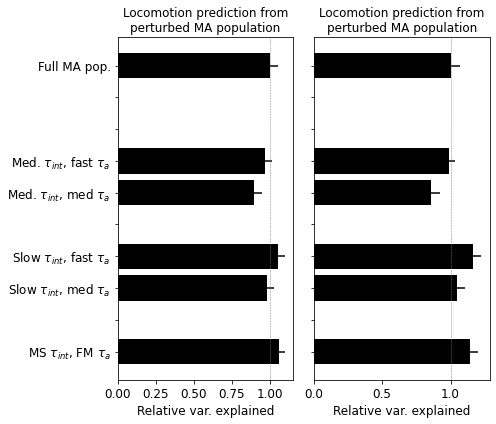

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(7, 6), tight_layout=True, sharey=True)
for crslts, (ax, rslts) in enumerate(zip(axs, [rslts_1, rslts_60])):
    max_r2 = rslts[0][1]
    
    for crslt, (key, r2, err) in enumerate(rslts):
        ax.barh([-crslt], [r2/max_r2], xerr=[err/max_r2], color='k')
        
    ax.axvline(1, color='gray', ls='--', lw=.5)

    ax.set_yticks(-np.arange(len(rslts)))
    ax.set_yticklabels([rslt[0] for rslt in rslts])

    set_plot(ax, x_label='Relative var. explained', title='Locomotion prediction from\nperturbed MA population', font_size=12)
    
# fig.savefig('ms/fig_2a.svg')

In [14]:
stats.ttest_ind(r2s_1[1], r2s_1[3])  # med_int, fast_a  vs slow_int, fast_a

Ttest_indResult(statistic=-1.4468251796197682, pvalue=0.1533290846149662)

In [15]:
stats.ttest_ind(r2s_60[1], r2s_60[3])  # med_int, fast_a  vs slow_int, fast_a

Ttest_indResult(statistic=-2.408666185830873, pvalue=0.019208552134824537)